In [2]:
!pip install librosa
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
# Load 3 MP3 files
sample_num = 2
file1 = f'acapella_{sample_num}.mp3'
file2 = f'with_backing_{sample_num}.mp3'
file3 = f'extracted_vocals_{sample_num}.mp3'


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Sai\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Generating Spectrograms
Function definitions are used to load spectrograms and compute the cross correlation coefficient for the spectrograms

In [3]:
# Function to load audio file and generate spectrogram
def get_spectrogram(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)
    
    # Calculate spectrogram
    D = np.abs(librosa.stft(y))
    return librosa.amplitude_to_db(D, ref=np.max), sr

# Function to calculate cross-correlation coefficient between spectrograms
def cross_correlation_coefficient(spec1, spec2):
    # Ensure both spectrograms have the same number of columns (time bins)
    min_time_bins = min(spec1.shape[1], spec2.shape[1])
    spec1_trimmed = spec1[:, :min_time_bins]
    spec2_trimmed = spec2[:, :min_time_bins]
    
    # Compute cross-correlation coefficient
    mean_spec1 = np.mean(spec1_trimmed)
    mean_spec2 = np.mean(spec2_trimmed)
    numerator = np.sum((spec1_trimmed - mean_spec1) * (spec2_trimmed - mean_spec2))
    denominator = np.sqrt(np.sum((spec1_trimmed - mean_spec1)**2) * np.sum((spec2_trimmed - mean_spec2)**2))
    
    # Handle division by zero or very small denominator
    if denominator == 0:
        return 0.0  # or handle differently as per your application
    
    return numerator / denominator

def pad_spectrogram(spec1, spec2):
    # Pad the smaller spectrogram to match the size of the larger one
    max_width = max(spec1.shape[1], spec2.shape[1])
    spec1 = np.pad(spec1, ((0, 0), (0, max_width - spec1.shape[1])), mode='constant')
    spec2 = np.pad(spec2, ((0, 0), (0, max_width - spec2.shape[1])), mode='constant')
    return spec1, spec2

In [4]:
# Generate spectrograms
spec1, sr1 = get_spectrogram(file1)
spec2, sr2 = get_spectrogram(file2)
spec3, sr3 = get_spectrogram(file3)

### Spectrogram Visualization
In this cell we visualize the spectrogram of the sample with raw vocals, back track, and extracted vocals. The backtrack can be seen in the 0-128 hz frequency range in particular, and the extracted vocals have noise that lingers which the raw vocals do not

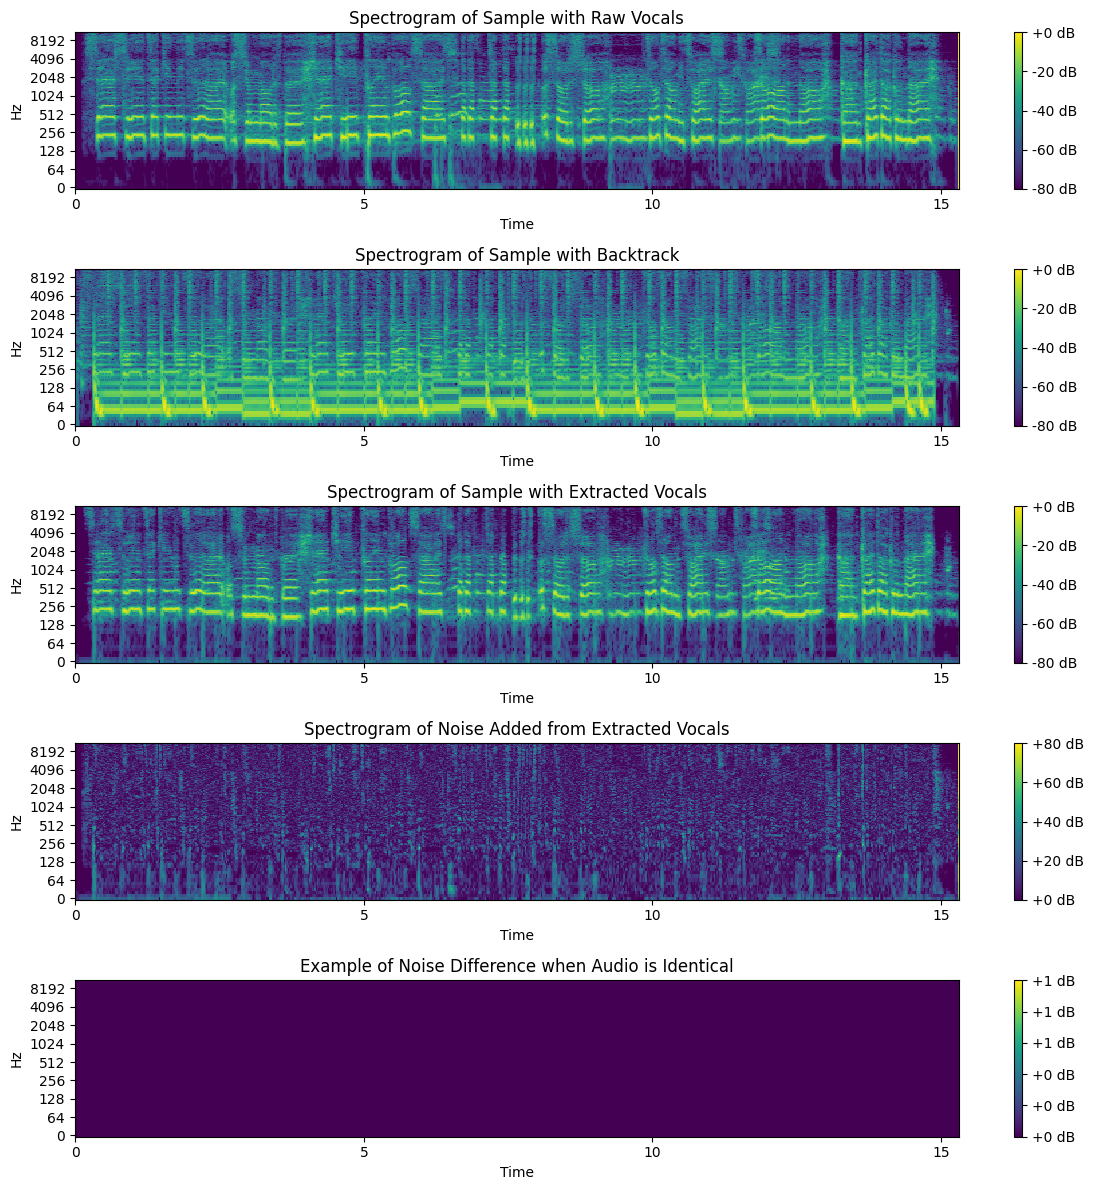

In [8]:
# Plot spectrograms

cmap = 'viridis'

plt.figure(figsize=(12, 12))

# Plot spectrogram 1
plt.subplot(5, 1, 1)
librosa.display.specshow(spec1, sr=sr1, x_axis='time', y_axis='log',cmap=cmap)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Sample with Raw Vocals')

# Plot spectrogram 2
plt.subplot(5, 1, 2)
librosa.display.specshow(spec2, sr=sr2, x_axis='time', y_axis='log',cmap=cmap)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Sample with Backtrack')

# Plot spectrogram 3
plt.subplot(5, 1, 3)
librosa.display.specshow(spec3, sr=sr3, x_axis='time', y_axis='log',cmap=cmap)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Sample with Extracted Vocals')

# # Plot spectrogram 4
spec1, spec3 = pad_spectrogram(spec1, spec3)

plt.subplot(5, 1, 4)
librosa.display.specshow(abs(spec3-spec1), sr=sr3, x_axis='time', y_axis='log',cmap=cmap)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Noise Added from Extracted Vocals')

# Plot spectrogram 5
plt.subplot(5, 1, 5)
librosa.display.specshow(abs(spec1-spec1), sr=sr3, x_axis='time', y_axis='log',cmap=cmap,vmin=0, vmax=1)
plt.colorbar(format='%+2.0f dB')
plt.title('Example of Noise Difference when Audio is Identical')




plt.tight_layout()
plt.show()


In [6]:
# Calculate cross-correlation coefficient
corr_coefficient = cross_correlation_coefficient(spec1, spec3)
print(f"Cross-correlation coefficient between the spectrograms: {corr_coefficient}")

Cross-correlation coefficient between the spectrograms: 0.5796784162521362
